<div align="center">
<p align="center" style="width: 100%;">
    <img src="https://raw.githubusercontent.com/vlm-run/.github/refs/heads/main/profile/assets/vlm-black.svg" alt="VLM Run Logo" width="80" style="margin-bottom: -5px; color: #2e3138; vertical-align: middle; padding-right: 5px;"><br>
</p>
<p align="center"><a href="https://docs.vlm.run"><b>Website</b></a> | <a href="https://docs.vlm.run/"><b>API Docs</b></a> | <a href="https://docs.vlm.run/blog"><b>Blog</b></a> | <a href="https://discord.gg/AMApC2UzVY"><b>Discord</b></a>
</p>
<p align="center">
<a href="https://discord.gg/AMApC2UzVY"><img alt="Discord" src="https://img.shields.io/badge/discord-chat-purple?color=%235765F2&label=discord&logo=discord"></a>
<a href="https://twitter.com/vlmrun"><img alt="Twitter Follow" src="https://img.shields.io/twitter/follow/vlmrun.svg?style=social&logo=twitter"></a>
</p>
</div>

Welcome to **[VLM Run Cookbooks](https://github.com/vlm-run/vlmrun-cookbook)**, a comprehensive collection of examples and notebooks demonstrating the power of structured visual understanding using the [VLM Run Platform](https://app.vlm.run).


## Document Layout Detection

This notebook demonstrates how to use VLM Run's Document Agent to analyze document layouts and extract structured information including:
- Document structure elements (headers, paragraphs, tables, lists, etc.)
- Bounding boxes for each element
- Reading order analysis
- Element type classification

The Document Agent can identify and analyze various layout elements:
- **Headers**: H1-H6 level headers with hierarchical structure
- **Paragraphs**: Body text blocks with proper text flow
- **Titles**: Main title of the document
- **Tables**: Structured data with row/column detection
- **Figures**: Images, charts, diagrams, and visual elements
- **Lists**: Bulleted and numbered list structures
- **Captions**: Figure and table captions with associations
- **Footnotes**: Footnotes with references and content
- **Formulas**: Mathematical formulas and equations
- **Pictures**: Images and visual elements
- **Section Headers**: Section headers and titles
- **Page Headers/Footers**: Header and footer content

Reference: [VLM Run Layout Detection Documentation](https://docs.vlm.run/agents/capabilities/document/layout-understanding)


### Environment Setup

To get started, install the required packages and sign-up for an API key on the [VLM Run App](https://app.vlm.run).
- Store the VLM Run API key under the `VLMRUN_API_KEY` environment variable.


## Prerequisites

* Python 3.9+
* VLM Run API key (get one at [app.vlm.run](https://app.vlm.run))


## Setup

First, let's install the required packages:


In [1]:
! pip install "vlmrun[all]" --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.7/67.7 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 39.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.9/62.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 63.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 61.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.9/119.9 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 788.2/788.2 kB 

In [2]:
import os
import getpass

VLMRUN_BASE_URL = os.getenv("VLMRUN_BASE_URL", "https://agent.vlm.run/v1")
VLMRUN_API_KEY = os.getenv("VLMRUN_API_KEY", None)
if VLMRUN_API_KEY is None:
    VLMRUN_API_KEY = getpass.getpass("Enter your VLM Run API Key: ")


Enter your VLM Run API Key: ··········


Let's initialize the client configured for VLM Run


In [3]:
from vlmrun.client import VLMRun

# Initialize the VLMRun client
client = VLMRun(api_key= VLMRUN_API_KEY, base_url= VLMRUN_BASE_URL)

In [4]:
# Analyze document layout
response = client.agent.completions.create(
    model="vlmrun-orion-1:auto",
    messages=[
        {
          "role": "user",
          "content": [
            {"type": "text", "text": "Analyze the document layout and identify all elements with bounding boxes"},
            {"type": "image_url", "image_url": {"url": "https://storage.googleapis.com/vlm-data-public-prod/hub/examples/document.layout/qwen-25-vl-tech-report.jpg", "detail": "auto"}}
          ]
        }
    ]
)

print(response.choices[0].message.content)

I have analyzed the layout of the document `img_29db7a`. Here are the detected elements and their bounding box coordinates (normalized [x, y, w, h]):

*   **text**: [0.0236, 0.3105, 0.0374, 0.4238]
*   **page-header**: [0.1179, 0.0244, 0.0874, 0.0234]
*   **page-header**: [0.7864, 0.0381, 0.1054, 0.0127]
*   **title**: [0.3356, 0.0811, 0.337, 0.0195]
*   **text**: [0.3939, 0.1182, 0.2205, 0.0146]
*   **picture**: [0.3218, 0.1445, 0.0208, 0.0137]
*   **text**: [0.3592, 0.1465, 0.19, 0.0117]
*   **picture**: [0.3204, 0.1602, 0.0222, 0.0127]
*   **text**: [0.3592, 0.1611, 0.2316, 0.0117]
*   **picture**: [0.3162, 0.1738, 0.0264, 0.0127]
*   **text**: [0.3592, 0.1748, 0.3343, 0.0117]
*   **picture**: [0.3204, 0.1875, 0.0222, 0.0137]
*   **text**: [0.3592, 0.1885, 0.3093, 0.0127]
*   **section-header**: [0.4646, 0.2148, 0.0804, 0.0137]
*   **text**: [0.1761, 0.2461, 0.656, 0.332]
*   **picture**: [0.1234, 0.6084, 0.7587, 0.2812]
*   **page-footer**: [0.4979, 0.9521, 0.0111, 0.0117]


### Define the Structured Output Schema

We'll use Pydantic models to define the expected structure of the layout detection response.


In [5]:
from pydantic import BaseModel, Field

# Define the response schema
class LayoutElement(BaseModel):
  type: str = Field(..., description="Type of layout element")
  xywh: tuple[float, float, float, float] = Field(..., description="Bounding box (x, y, w, h)")

class LayoutResponse(BaseModel):
  elements: list[LayoutElement] = Field(..., description="List of layout elements")
print("Schema defined successfully!")


Schema defined successfully!


### Load a Sample Document

Let's use the example document from the VLM Run documentation.


Using document image:


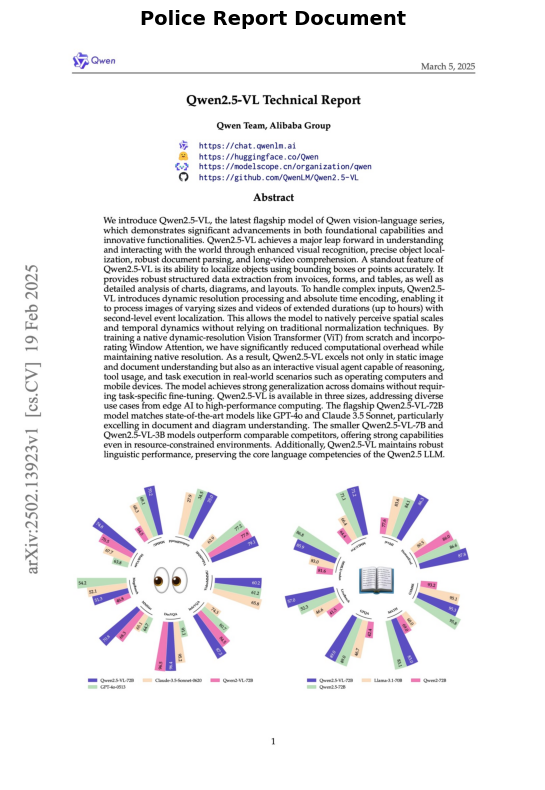

In [6]:
# Sample document URL from VLM Run documentation
document_url = "https://storage.googleapis.com/vlm-data-public-prod/hub/examples/document.layout/qwen-25-vl-tech-report.jpg"
print(f"Using document image:")

# Display the image
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

response_img = requests.get(document_url)
img = Image.open(BytesIO(response_img.content))

plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')
plt.title("Police Report Document", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


### Analyze Document Layout

Now, let's call the VLM Run API to analyze the document layout and extract structured information.


In [7]:
# Analyze document layout with structured output
response = client.agent.completions.create(
    model="vlmrun-orion-1:auto",
    messages=[
        {
          "role": "user",
          "content": [
            {"type": "text", "text": "Analyze the document layout and identify all elements with bounding boxes"},
            {"type": "image_url", "image_url": {"url": document_url , "detail": "auto"}}
          ]
        }
    ],
    response_format={"type": "json_schema", "schema": LayoutResponse.model_json_schema()},
)

# Validate the response
result = LayoutResponse.model_validate_json(response.choices[0].message.content)
print("Layout analysis completed!")
print(f"\nRaw response:\n{response.choices[0].message.content}")


Layout analysis completed!

Raw response:
{"elements":[{"type":"text","xywh":[0.0236,0.3105,0.0374,0.4238]},{"type":"page-header","xywh":[0.1179,0.0244,0.0874,0.0234]},{"type":"page-header","xywh":[0.7864,0.0381,0.1054,0.0127]},{"type":"title","xywh":[0.3356,0.0811,0.337,0.0195]},{"type":"text","xywh":[0.3939,0.1182,0.2205,0.0146]},{"type":"picture","xywh":[0.3218,0.1445,0.0208,0.0137]},{"type":"text","xywh":[0.3592,0.1465,0.19,0.0117]},{"type":"picture","xywh":[0.3204,0.1602,0.0222,0.0127]},{"type":"text","xywh":[0.3592,0.1611,0.2316,0.0117]},{"type":"picture","xywh":[0.3162,0.1738,0.0264,0.0127]},{"type":"text","xywh":[0.3592,0.1748,0.3343,0.0117]},{"type":"picture","xywh":[0.3204,0.1875,0.0222,0.0137]},{"type":"text","xywh":[0.3592,0.1885,0.3093,0.0127]},{"type":"section-header","xywh":[0.4646,0.2148,0.0804,0.0137]},{"type":"text","xywh":[0.1761,0.2461,0.656,0.332]},{"type":"picture","xywh":[0.1234,0.6084,0.7587,0.2812]},{"type":"page-footer","xywh":[0.4979,0.9521,0.0111,0.0117]}]}


### Parse and Validate the Response

Let's parse the response into our Pydantic model to ensure it matches the expected schema.


In [8]:
import json
import pandas as pd

# Parse and validate the response
layout_result = LayoutResponse.model_validate_json(response.choices[0].message.content)

print(f"\nDetected {len(layout_result.elements)} layout elements\n")

# Convert to a pandas DataFrame for better visualization
elements_data = []
for idx, element in enumerate(layout_result.elements):
    x, y, w, h = element.xywh
    elements_data.append({
        "Index": idx,
        "Type": element.type,
        "X": f"{x:.3f}",
        "Y": f"{y:.3f}",
        "Width": f"{w:.3f}",
        "Height": f"{h:.3f}"
    })

df_elements = pd.DataFrame(elements_data)
df_elements



Detected 17 layout elements



,Index,Type,X,Y,Width,Height
0,0,text,0.024,0.310,0.037,0.424
1,1,page-header,0.118,0.024,0.087,0.023
2,2,page-header,0.786,0.038,0.105,0.013
3,3,title,0.336,0.081,0.337,0.019
4,4,text,0.394,0.118,0.221,0.015
5,5,picture,0.322,0.144,0.021,0.014
6,6,text,0.359,0.146,0.190,0.012
7,7,picture,0.320,0.160,0.022,0.013
8,8,text,0.359,0.161,0.232,0.012
9,9,picture,0.316,0.174,0.026,0.013


### Visualize the Layout

Let's visualize the detected layout elements on the original document.


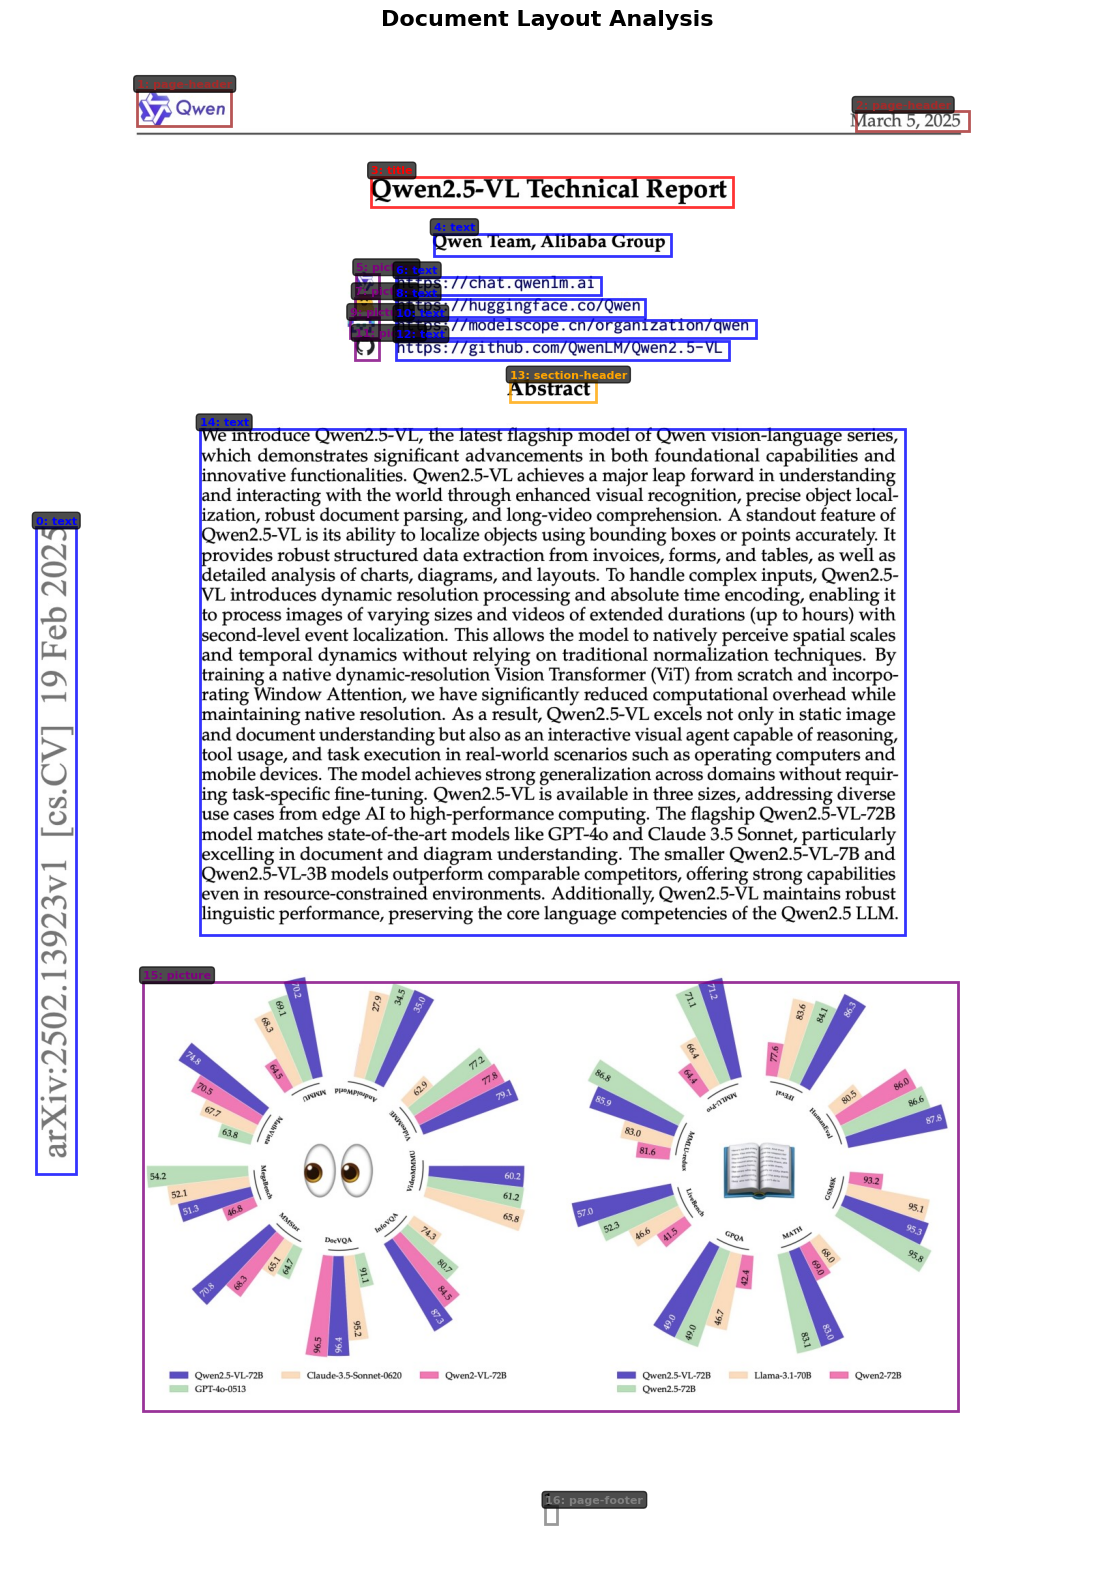


Legend:
  title                → red
  section-header       → orange
  text                 → blue
  table                → green
  picture              → purple
  caption              → cyan
  formula              → magenta
  list-item            → yellow
  footnote             → pink
  page-header          → brown
  page-footer          → gray


In [9]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import requests
from io import BytesIO
import numpy as np

# Load the document image
response_img = requests.get(document_url)
img = Image.open(BytesIO(response_img.content))
img_width, img_height = img.size

# Create figure and axis
fig, ax = plt.subplots(1, figsize=(12, 16))
ax.imshow(img)

# Define colors for different element types
color_map = {
    "title": "red",
    "section-header": "orange",
    "text": "blue",
    "table": "green",
    "picture": "purple",
    "caption": "cyan",
    "formula": "magenta",
    "list-item": "yellow",
    "footnote": "pink",
    "page-header": "brown",
    "page-footer": "gray"
}

# Draw bounding boxes
for idx, element in enumerate(layout_result.elements):
    x, y, w, h = element.xywh
    # Convert normalized coordinates to pixel coordinates
    x_px = x * img_width
    y_px = y * img_height
    w_px = w * img_width
    h_px = h * img_height

    color = color_map.get(element.type, "white")
    rect = patches.Rectangle(
        (x_px, y_px), w_px, h_px,
        linewidth=2,
        edgecolor=color,
        facecolor='none',
        alpha=0.8
    )
    ax.add_patch(rect)

    # Add label
    ax.text(
        x_px, y_px - 5,
        f"{idx}: {element.type}",
        color=color,
        fontsize=8,
        fontweight='bold',
        bbox=dict(boxstyle='round,pad=0.3', facecolor='black', alpha=0.7)
    )

ax.axis('off')
plt.title("Document Layout Analysis", fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n" + "="*50)
print("Legend:")
print("="*50)
for elem_type, color in color_map.items():
    print(f"  {elem_type:20s} → {color}")


## Document Visual Grounding

This notebook demonstrates how to use VLM Run's Document Agent to connect text elements with their visual locations in documents. Visual grounding enables precise content understanding by mapping text to specific regions in images.

**Key Capabilities:**
- Map text elements to their visual locations with bounding boxes
- Detect spatial relationships between elements
- Identify cross-references (figures, tables, sections)
- Extract label-field pairs from forms
- Understand hierarchical document structure

**Use Cases:**
- **Interactive Document Analysis**: Navigate documents by clicking on text
- **Content Verification**: Validate form fields and data accuracy
- **Automated Form Filling**: Map form labels to input fields
- **Document Comparison**: Compare visual elements across documents
- **Data Extraction**: Extract structured data with spatial context

**Supported Text-Visual Mappings:**
- **Form Fields**: Connect labels with input fields, checkboxes, and buttons
- **Data Fields**: Map data labels with their corresponding values
- **Interactive Elements**: Link text instructions with clickable elements
- **Validation Rules**: Connect validation text with form fields
- **Cross-References**: Map text mentions with figures, tables, and sections

Reference: [VLM Run Visual Grounding Documentation](https://docs.vlm.run/agents/capabilities/document/visual-grounding)


### Load a Sample Document

Let's use the example document from the VLM Run documentation.


Using document image:


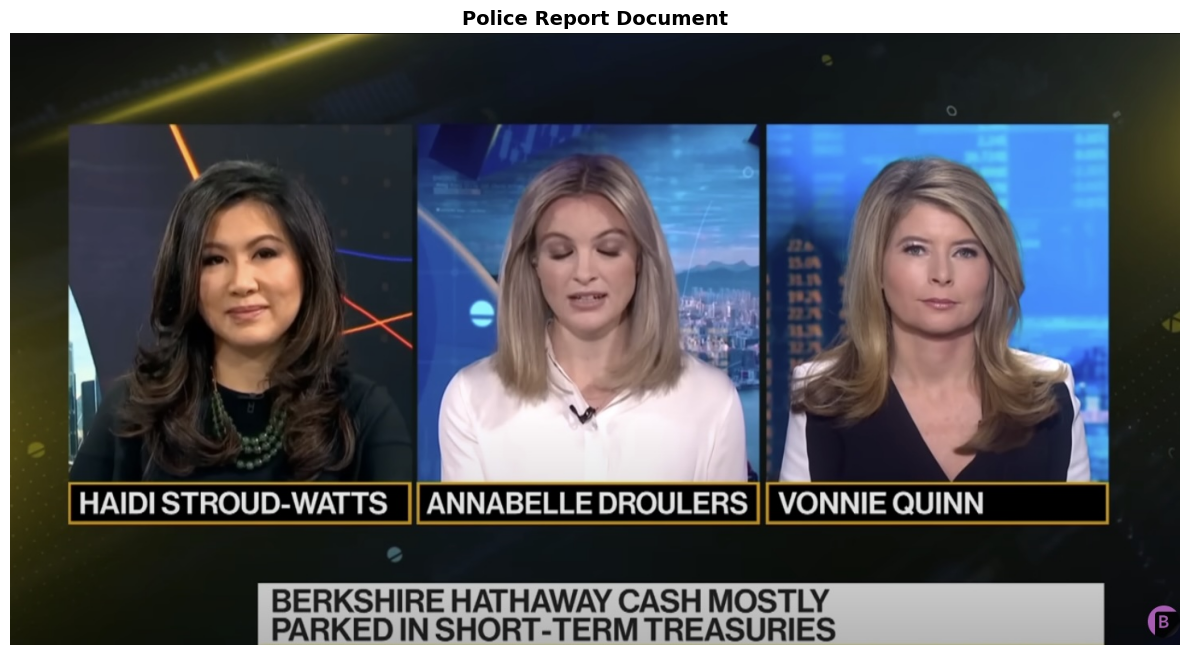

In [10]:
# Sample document URL from VLM Run documentation
document_url = "https://storage.googleapis.com/vlm-data-public-prod/hub/examples/media.tv-news/finance_bb_3_speakers.jpg"
print(f"Using document image:")

# Display the image
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

response_img = requests.get(document_url)
img = Image.open(BytesIO(response_img.content))

plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')
plt.title("Police Report Document", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


In [11]:
response = client.agent.completions.create(
    model="vlmrun-orion-1:auto",
    messages=[
        {
          "role": "user",
          "content": [
            {"type": "text", "text": "Localize all the speaker names in the TV news broadcast text and visualize them on the image. Only provide one bounding box for each speaker name."},
            {"type": "image_url", "image_url": {"url": document_url, "detail": "auto"}}
          ]
        }
    ]
)

print(response.choices[0].message.content)

I have localized and visualized the speaker names on the image `img_d84435`. The resulting image with the bounding boxes around the speaker names is `img_53af28`.


### Define the Structured Output Schema

We'll use Pydantic models to define the expected structure of the layout detection response.


In [12]:
# Define the response schema
class GroundingWithText(BaseModel):
  content: str = Field(..., description="The text content")
  xywh: tuple[float, float, float, float] = Field(..., description="Bounding box (x, y, w, h)")

class GroundingResponse(BaseModel):
  elements: list[GroundingWithText] = Field(..., description="Text to visual mappings")
print("Schema defined successfully!")


Schema defined successfully!


In [13]:
# Perform visual grounding with structured output
response = client.agent.completions.create(
    model="vlmrun-orion-1:auto",
    messages=[
        {
          "role": "user",
          "content": [
            {"type": "text", "text": "Localize all the speaker names in the TV news broadcast text and visualize them on the image. Only provide one bounding box for each speaker name."},
            {"type": "image_url", "image_url": {"url": document_url, "detail": "auto"}}
          ]
        }
    ],
    response_format={"type": "json_schema", "schema": GroundingResponse.model_json_schema()},
)

# Validate the response
result = GroundingResponse.model_validate_json(response.choices[0].message.content)

print("Layout analysis completed!")
print(f"\nRaw response:\n{response.choices[0].message.content}")

Layout analysis completed!

Raw response:
{"elements":[{"content":"I have localized the speaker names in the image and highlighted them with bounding boxes. You can see the result in img_abdd91.","xywh":[0,0,1,1]}]}


## Multi-Page Analysis

Process and analyze documents across multiple pages with context preservation and cross-document correlation

Process and analyze documents across multiple pages with context preservation and cross-document correlation. Perfect for medical record processing, legal document review, multi-document workflows, and comprehensive document analysis that requires understanding relationships between different document types.

### Load a Sample Document

Let's use the example document from the VLM Run documentation.


In [14]:
document_url = "https://storage.googleapis.com/vlm-data-public-prod/hub/examples/document.agent/multi-document-input-example.pdf"

In [15]:
# Analyze multi-page medical documents
response = client.agent.completions.create(
    model="vlmrun-orion-1:auto",
    messages=[
        {
          "role": "user",
          "content": [
            {"type": "text", "text": "Analyze this multi-page medical document set. Extract patient referral page, medical insurance card and identification form in 3 separate fields in JSON format."},
            {"type": "file_url", "file_url": {"url": document_url, "detail": "auto"}}
          ]
        }
    ]
)

print(response.choices[0].message.content)

I have successfully extracted the information from the document `doc_683482`. Here is the requested information in JSON format:

```json
{
  "patient referral page": "www.cviga.org\nCENTER\nFOR THE\nVISUALLY\nIMPAIRED\nPatient Referral Form\nPlease fax this form to CVI at 404-875-4568\nPatient Name: Samuel Jackson\nDate of Birth: 6/4/72 Patient's Phone: 847-292-8014\nAddress: 1643 Elmwood Drive\nCity/State/Zip: Treeslave, NY 10027\nPreferred Contact Name and Number (if other than patient):\nDiagnosis: Retinal Detachment\nVisual Acuities: Distance cc OD:\n20/40\ncc OS\n20160\nVisual Fields (please fax field chart if available):\nReferred by:\nPhysician's name (please print): Johu\nPhysician's signature: Ph\nUPIN:\nNPI: 1134562341 Phone:\nAddress: 583 Raven Lame\nCity, State, Zip: Elmsford, NY 10734\nT\nReferral Date: 8128/24 Date of Office Visit: 8/25/24\nHow did you hear about CVI:\nQuestions? Contact Client Services at 404.875.9011\n739 West Peachtree St. NW Atlanta, GA 30308 Ph: 404.

### Define the Structured Output Schema

We'll use Pydantic models to define the expected structure of the layout detection response.


In [16]:
from vlmrun.client import VLMRun
from pydantic import BaseModel, Field
from typing import Literal

# Define the response schema
class DocumentPage(BaseModel):
  page_id: int = Field(..., description="Page number (0-indexed)")
  document_type: Literal["referral", "insurance-card", "identification"]

class MultiPageResponse(BaseModel):
  pages: list[DocumentPage] = Field(..., description="List of document pages")

print("Schema defined successfully!")


Schema defined successfully!


In [17]:
# Analyze multi-page document with structured output
response = client.agent.completions.create(
    model="vlmrun-orion-1:auto",
    messages=[
        {
          "role": "user",
          "content": [
            {"type": "text", "text": "Analyze this multi-page medical document set. Extract patient referral page, medical insurance card and identification form in 3 separate fields in JSON format."},
            {"type": "file_url", "file_url": {"url": "https://storage.googleapis.com/vlm-data-public-prod/hub/examples/document.agent/multi-document-input-example.pdf", "detail": "auto"}}
          ]
        }
    ],
    response_format={"type": "json_schema", "schema": MultiPageResponse.model_json_schema()},
)


# Validate the response
result = MultiPageResponse.model_validate_json(response.choices[0].message.content)

print("Layout analysis completed!")
print(f"\nRaw response:\n{response.choices[0].message.content}")

Layout analysis completed!

Raw response:
{"pages":[{"page_id":0,"document_type":"referral"},{"page_id":2,"document_type":"insurance-card"},{"page_id":3,"document_type":"identification"}]}


## Additional Resources

- [VLM Run Documentation](https://docs.vlm.run)
- [API Reference](https://docs.vlm.run/agents/capabilities/image/captioning)
- [More Examples](https://github.com/vlm-run/vlmrun-cookbook)
- [Discord Community](https://discord.gg/AMApC2UzVY)


### Next Steps

- Explore the [VLM Run Documentation](https://docs.vlm.run) for more details
- Join our [Discord community](https://discord.gg/AMApC2UzVY) for support
- Check out more examples in the [VLM Run Cookbook](https://github.com/vlm-run/vlmrun-cookbook)

Happy building!